## Import Libraries

In [ ]:
!pip install pmdarima
!pip install PSF_Py

In [109]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import json
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#import os

# Gráficos
# ==============================================================================
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Model
# ==============================================================================
import calendar
from statsmodels.graphics.tsaplots import month_plot
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from PSF_Py import Psf
from sklearn.metrics import mean_squared_error as rmse
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.statespace.tools import diff
from pmdarima.arima.utils import ndiffs, nsdiffs

## Load Data

In [113]:
df = pd.read_csv("data_test(2).csv"
                 ,parse_dates=['paidAt'])

df = df[df['status'] == 'PAID']
df = df.drop(['status'], axis=1)

In [114]:
# Creamos una columna con el periodo que deseamos trabajar
df['period'] = df['paidAt'].dt.to_period('M').dt.to_timestamp()

In [116]:
# Control de datos
df['amount'].describe()

count       892.00
mean      30752.26
std      154172.75
min          58.16
25%        1313.61
50%        1490.46
75%        5541.03
max     3370741.92
Name: amount, dtype: float64

## Model AMOUNT

In [176]:
# Generación del dataset para realizar la serie de tiempo
# ==============================================================================
df_monthly = df.groupby(['period'])['amount'].sum()
df_monthly = df_monthly.to_frame()

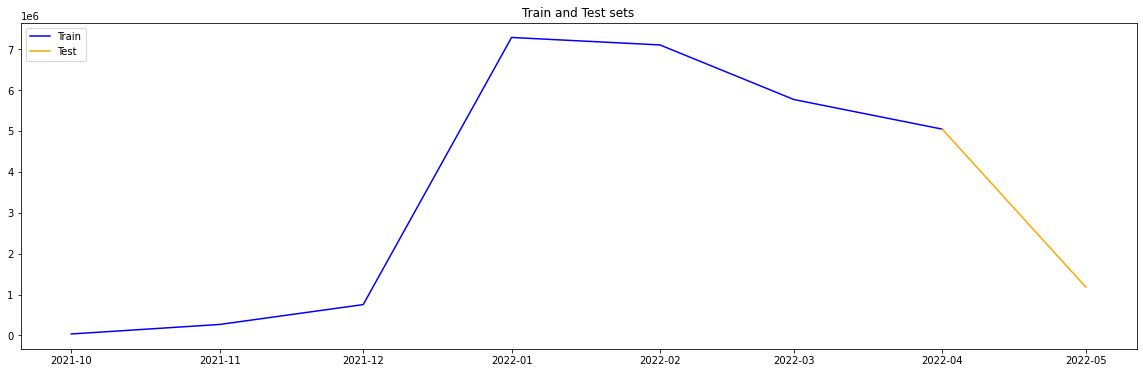

In [177]:
# Separación en train y test
# ==============================================================================
start_test = 6
train = df_monthly.iloc[:7]
test = df_monthly.iloc[start_test:]


plt.subplots(figsize = (20,6))
plt.plot(train, label = 'Train', color='blue')
plt.plot(test, label = 'Test', color='orange')
plt.title('Train and Test sets')
plt.legend(loc='upper left')
plt.show()

In [178]:
# Auto ARIMA Model
# ==============================================================================
arima_model = auto_arima(train, start_p=0,  start_q=0, max_p=0, max_d=2, max_q=0)

arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    7
Model:                        SARIMAX   Log Likelihood                -114.405
Date:                Sat, 27 Aug 2022   AIC                            232.810
Time:                        18:13:00   BIC                            232.702
Sample:                    10-01-2021   HQIC                           231.473
                         - 04-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.75e+06   1.21e+06      3.109      0.002    1.39e+06    6.11e+06
sigma2      9.191e+12   1.57e+13      0.584      0.559   -2.17e+13       4e+13
===================================================================================
Ljung-Box (L1) (Q):                   2.93   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.09   Prob(JB):                         0.62
Heteroskedasticity (H):               0.22   Skew:                            -0.14
Prob(H) (two-sided):                  0.36   Kurtosis:                         1.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [179]:
prediction = pd.DataFrame(arima_model.predict(test.shape[0]), index = test.index)
prediction.columns = ['amount']

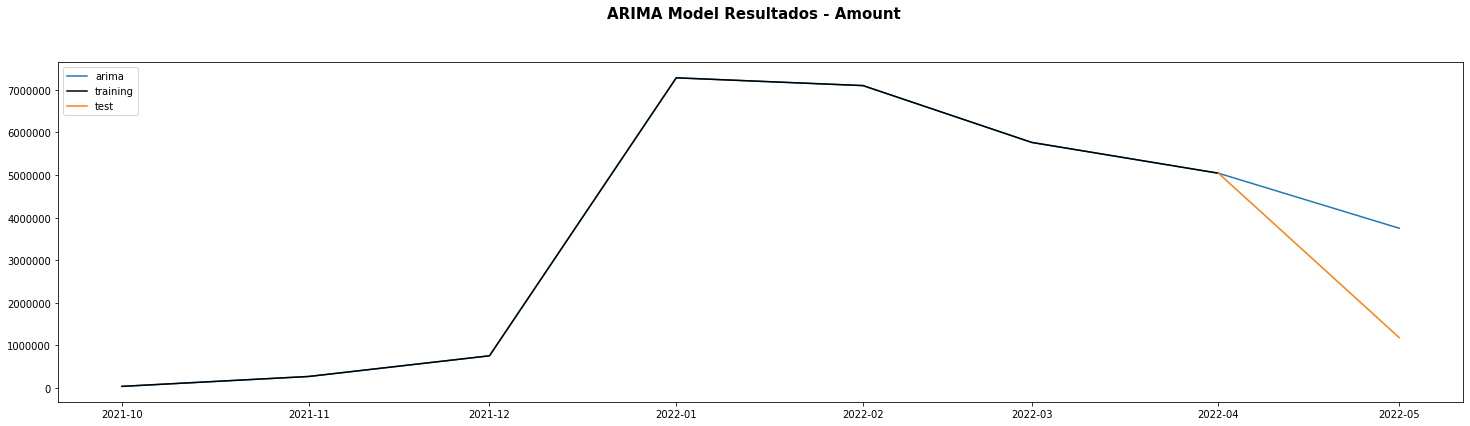

In [180]:
# Resultados
# ==============================================================================
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,6))

plt.plot(pd.concat([train,test.iloc[:1],prediction.iloc[1:]]),label='arima')
plt.plot(train,color = 'black', label = 'training')
plt.plot(test, label = 'test')
plt.legend(loc='upper left')

fig.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.subplots_adjust(top = 0.85)
fig.suptitle('ARIMA Model Resultados - Amount', fontsize = 15, fontweight = "bold")
plt.show()

In [181]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def process_metrics(y_true, y_pred):
    """Compute metrics based on model predictions.
    Args:
        - y_true: ground truth.
        - y_pred: prediction.
    Returns:
        - metrics: dictionary with all computed metrics.
    """
    metrics = {}

    metrics['MAE'] = mean_absolute_error(y_true,y_pred)
    metrics['MSE'] = mean_squared_error(y_true,y_pred)
    metrics['RMSE'] = np.sqrt(mean_squared_error(y_true,y_pred))
    metrics['RMSLogE'] = np.log(np.sqrt(mean_squared_error(y_true,y_pred)))
    metrics['r2'] = r2_score(y_true,y_pred)
    #metrics['r2Adjust'] = 1 - ((1-r2_score(y_true,y_pred))*(n-1)/(n-k-1))

    return metrics

In [182]:
# Métricas
# ==============================================================================
y_pred = prediction.iloc[1:]
y_true = test.iloc[:1]

In [183]:
process_metrics(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


{'MAE': 1292367.6485714288,
 'MSE': 1670214139074.0442,
 'RMSE': 1292367.6485714288,
 'RMSLogE': 14.07198648056364,
 'r2': nan}

## Model AMOUNTFINANCEDBYXEPELIN

In [184]:
# Generación del dataset para realizar la serie de tiempo
# ==============================================================================
df_monthly = df.groupby(['period'])['amountfinancedByXepelin'].sum()
df_monthly = df_monthly.to_frame()

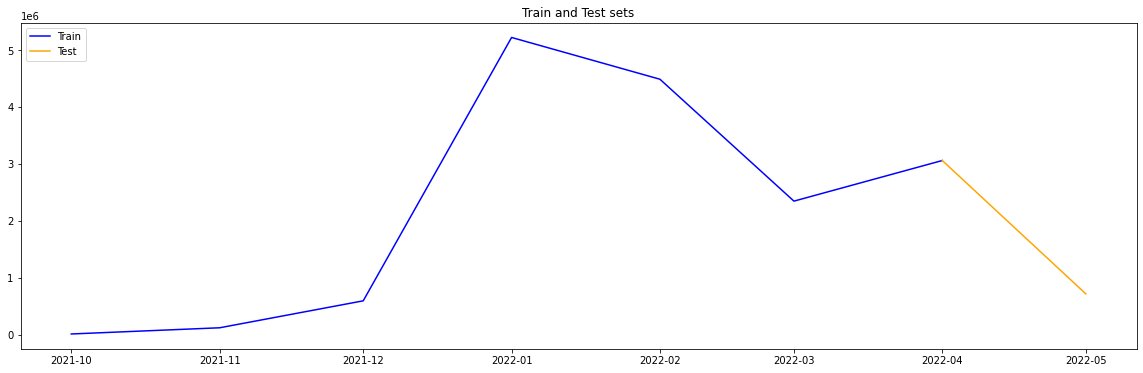

In [185]:
# Separación en train y test
# ==============================================================================
start_test = 6
train = df_monthly.iloc[:7]
test = df_monthly.iloc[start_test:]


plt.subplots(figsize = (20,6))
plt.plot(train, label = 'Train', color='blue')
plt.plot(test, label = 'Test', color='orange')
plt.title('Train and Test sets')
plt.legend(loc='upper left')
plt.show()

In [186]:
# Auto ARIMA Model
# ==============================================================================
arima_model = auto_arima(train, start_p=0,  start_q=0, max_p=0, max_d=2, max_q=0)

arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    7
Model:                        SARIMAX   Log Likelihood                -111.337
Date:                Sat, 27 Aug 2022   AIC                            226.674
Time:                        18:13:20   BIC                            226.566
Sample:                    10-01-2021   HQIC                           225.337
                         - 04-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.261e+06   7.76e+05      2.914      0.004     7.4e+05    3.78e+06
sigma2      3.825e+12    4.2e+12      0.911      0.363   -4.41e+12    1.21e+13
===================================================================================
Ljung-Box (L1) (Q):                   1.55   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.21   Prob(JB):                         0.71
Heteroskedasticity (H):               0.07   Skew:                             0.22
Prob(H) (two-sided):                  0.12   Kurtosis:                         1.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [187]:
prediction = pd.DataFrame(arima_model.predict(test.shape[0]), index = test.index)
prediction.columns = ['amountfinancedByXepelin']

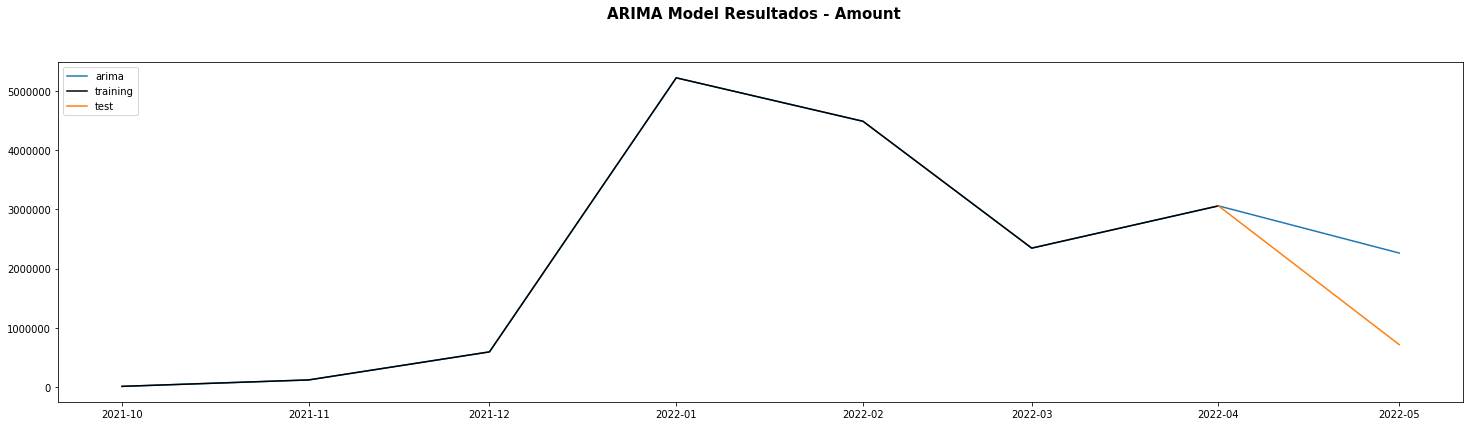

In [188]:
# Resultados
# ==============================================================================
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,6))

plt.plot(pd.concat([train,test.iloc[:1],prediction.iloc[1:]]),label='arima')
plt.plot(train,color = 'black', label = 'training')
plt.plot(test, label = 'test')
plt.legend(loc='upper left')

fig.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.subplots_adjust(top = 0.85)
fig.suptitle('ARIMA Model Resultados - Amount', fontsize = 15, fontweight = "bold")
plt.show()

In [189]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def process_metrics(y_true, y_pred):
    """Compute metrics based on model predictions.
    Args:
        - y_true: ground truth.
        - y_pred: prediction.
    Returns:
        - metrics: dictionary with all computed metrics.
    """
    metrics = {}

    metrics['MAE'] = mean_absolute_error(y_true,y_pred)
    metrics['MSE'] = mean_squared_error(y_true,y_pred)
    metrics['RMSE'] = np.sqrt(mean_squared_error(y_true,y_pred))
    metrics['RMSLogE'] = np.log(np.sqrt(mean_squared_error(y_true,y_pred)))
    metrics['r2'] = r2_score(y_true,y_pred)
    #metrics['r2Adjust'] = 1 - ((1-r2_score(y_true,y_pred))*(n-1)/(n-k-1))

    return metrics

In [190]:
# Métricas
# ==============================================================================
y_pred = prediction.iloc[1:]
y_true = test.iloc[:1]

In [191]:
process_metrics(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


{'MAE': 796416.4314285712,
 'MSE': 634279132249.42,
 'RMSE': 796416.4314285712,
 'RMSLogE': 13.58787748308964,
 'r2': nan}